In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from EOF import EOF
import datetime 

In [8]:
pr_start = 20
pr_leap = 10
pr_to = 60
total_pr = (pr_to - pr_start) / pr_leap

start = 0
end   = 3700
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)




print("done")


done


In [9]:
from Dycore import Dycore
def read_all_var(pr_start, pr_to, pr_leap, start, end, internal_day, total_file):
        total_pr = int((pr_to - pr_start) / pr_leap)
        total_day = int(total_file*internal_day)
        
        qv      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        qv_diff = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        u       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        v       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        omega   = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        t       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        ps      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        z_full  = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
    
        p_half  = np.zeros(((((total_pr, total_day, 21, 64, 128)))))

        print(qv.shape)
        a = 0
        for pr in range(pr_start, pr_to, pr_leap):
            k = 0
            for day in range(start,end,internal_day):
                    print(day)
                    # file  = f"HSt42_{pr}_EMF_might_error_edition/RH80_PR{pr}_1600day_startfrom_{day}day_final.dat"
                    # file  = f"HSt42_{pr}/RH80_PR{pr}_20000day_startfrom_{day}day_final.dat"
                    file  = f"HSt42_{pr}/RH80_PR{pr}_20000day_startfrom_{day}day_final.dat"
                

                
                    dycore = Dycore(file)
                    qv[a,k*100:(k+1)*100,:,:,:]      = dycore.qv
                    qv_diff[a,k*100:(k+1)*100,:,:,:] = dycore.qv_diff
                    u[a,k*100:(k+1)*100,:,:,:]       = dycore.u
                    v[a,k*100:(k+1)*100,:,:,:]       = dycore.v
                    omega[a,k*100:(k+1)*100,:,:,:]       = dycore.w
                    
                    t[a,k*100:(k+1)*100,:,:,:]       = dycore.t
                    
                    ps[a,k*100:(k+1)*100,:,:,:]      = dycore.ps
                    p[a,k*100:(k+1)*100,:,:,:]       = dycore.p
                    z_full[a,k*100:(k+1)*100,:,:,:]       = dycore.z_full
                    
                    
                    p_half[a,k*100:(k+1)*100,:,:,:]  = dycore.p_half
                    #####################################################
                    # qv[a,:,:,:,:]      = dycore.qv
                    # qv_diff[a,:,:,:,:] = dycore.qv_diff
                    # u[a,:,:,:,:]       = dycore.u
                    # v[a,:,:,:,:]       = dycore.v
                    # omega[a,:,:,:,:]       = dycore.w
                    
                    # t[a,:,:,:,:]       = dycore.t
                    
                    # ps[a,:,:,:,:]      = dycore.ps
                    # p[a,:,:,:,:]       = dycore.p
                    # z_full[a,:,:,:,:]       = dycore.z_full
                    
                    
                    # p_half[a,:,:,:,:]  = dycore.p_half
                                
                    k += 1
            a += 1
        return qv, qv_diff, u, v, omega, t, p, ps, p_half, z_full

In [10]:
# dycore = Dycore(file)
qv, qv_diff, u, v, omega, t, p, ps, p_half, z_full = read_all_var(pr_start, pr_to, pr_leap, start , end, internal_day, total_file)  # 
print("done")

(4, 3700, 20, 64, 128)
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'HSt42_50/RH80_PR50_20000day_startfrom_1600day_final.dat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [564]:
qv.shape

(6, 1000, 20, 64, 128)

In [553]:
### read variables ###
u_file       = h5py.File("PR0_50_0_20000day_u.h5", "r")
w_file       = h5py.File("PR0_50_0_20000day_w.h5", "r")

qv_file      = h5py.File("PR0_50_0_20000day_qv.h5", "r")
qv_diff_file = h5py.File("PR0_50_0_20000day_qv_diff.h5", "r")
p_file       = h5py.File("PR0_50_0_20000day_p.h5", "r")
ps_file      = h5py.File("PR0_50_0_20000day_ps.h5", "r")
p_half_file  = h5py.File("PR0_50_0_20000day_p_half.h5", "r")

z_full_file  = h5py.File("PR0_50_0_20000day_z_full.h5", "r")



print("---1---")
u_origin       = np.asarray(u_file["u"][:,int(start):end,:,:,:])
print("---2---")
qv_diff_origin = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])
print("---3---")
p_origin       = np.asarray(p_file["p"][:,int(start):end,:,:,:])
print("---4---")
ps_origin      = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])
print("---5---")
p_half_origin  = np.asarray(p_half_file["p_half"][:,int(start):end,:,:,:])
print("---6---")

w_origin       = np.asarray(w_file["w"][:,int(start):end,:,:,:])
z_full_origin       = np.asarray(z_full_file["z_full"][:,int(start):end,:,:,:])


print("done")

u_file.close()
qv_file.close()
qv_diff_file.close()
p_file.close()
ps_file.close()
p_half_file.close()
w_file.close()
z_full_file.close()





---1---
---2---
---3---
---4---
---5---
---6---
done


In [554]:
v_file       = h5py.File("PR0_50_0_20000day_v.h5", "r")
v_origin       = np.asarray(v_file["v"][:,int(start):end,:,:,:])
t_file       = h5py.File("PR0_50_0_20000day_t.h5", "r")
t_origin       = np.asarray(t_file["t"][:,int(start):end,:,:,:])

v_file.close()
t_file.close()

print("done")

done


In [684]:
class TEM_dp_Sukiyoung:
    """
    Step 1. interpolation z -> z_new
    Step 2. Calculate v* and w*
    Step 3. Smooth v* and w* (there is singular point)
    Step 4. Calculate TEM streamfunction
    """
    ### Step 1. 
    def __init__(
        self, 
        input_v, 
        input_omega, 
        input_p, 
        input_ps, 
        input_t,
        input_z,
        single_day):

        self.Rd    = 287
        self.cp    = 1004
        self.g     = 9.81
        self.a     = 6.37122e6
        self.v = input_v
        self.omega = input_omega
        self.p  = input_p

        self.single_day = single_day
        self.ps = input_ps
        self.t = input_t
        self.z = input_z
        
        shape = self.z.shape
        self.day = 1 if single_day else shape[0]
        self.lev = shape[1] if single_day else shape[1]
        self.lat = shape[2] if single_day else shape[2]
        self.lon = shape[3] if not single_day else None
            
        # int
        if single_day: 
            self.p_onlyz = np.nanmean(self.p, axis=(1,2)) 
        else: 
            self.p_onlyz = np.nanmean(self.p, axis=(0,2,3)) 
        

        # Calculate mean sigma and Vzmtm
        if single_day:
            axis = 2
        else:
            axis = (0, 3)
        self.sigma_mean = np.nanmean(self.p / self.ps, axis=axis)
        self.Vzmtm = np.nanmean(self.v, axis=axis)
        
        self.sigma_onlyz          = np.nanmean(self.sigma_mean, axis=1)
        self.y                    = np.linspace(-90,90,64)
        self.yy, self.sigma_mean2 = np.meshgrid(self.y,self.sigma_onlyz)

        self.rho = self.p / self.ps
        self.w   = -self.omega / self.rho / self.g

        self.theta = self.t * (self.ps / self.p)**(self.Rd/self.cp)
    

    def _vTEM_wTEM(self):

        # THzm   = np.nanmean(theta, axis=(3))
        if self.single_day:
            THzmtm = np.nanmean(self.theta, axis=(2)) 
        else:
            THzmtm = np.nanmean(self.theta, axis=(0,3)) 
        
        self.dTHdp  = np.zeros((self.lev,self.lat)) 
        # Calculate dTHdp for interior points
        self.dTHdp[1:-1, :] = (THzmtm[2:, :] - THzmtm[:-2, :]) / (self.p_onlyz[2:].reshape(-1, 1) - self.p_onlyz[:-2].reshape(-1, 1))
        
        # Handle boundary conditions
        self.dTHdp[0, :]  = (THzmtm[1, :]  - THzmtm[0, :])  /  (self.p_onlyz[1]  - self.p_onlyz[0])
        self.dTHdp[-1, :] = (THzmtm[-1, :] - THzmtm[-2, :]) /  (self.p_onlyz[-1] - self.p_onlyz[-2])
        
        self.dTHdp[self.dTHdp == 0] = np.nan # just in case divided by zero 

        if self.single_day:
            Vza = np.zeros(self.v.shape)
            THETAza = np.zeros(self.v.shape)
            Vzm = np.nanmean(self.v, axis=2)
            THzm = np.nanmean(self.theta, axis=2)
            
            Vza = self.v - np.expand_dims(Vzm, axis=2)
            THETAza = self.theta - np.expand_dims(THzm, axis=2)
        else:
            Vza = np.zeros(self.v.shape)
            THETAza = np.zeros(self.v.shape)
            Vzm = np.nanmean(self.v, axis=3)
            THzm = np.nanmean(self.theta, axis=3)
            
            Vza = self.v - np.expand_dims(Vzm, axis=3)
            THETAza = self.theta - np.expand_dims(THzm, axis=3)
            
        self.VTHETA  = Vza * THETAza
        
        if self.single_day:
            VTHzm = np.nanmean(self.VTHETA, axis=2)  # Mean along longitude
            VTHzmtm = np.nanmean(VTHzm, axis=0)  # Mean along time
        
            Wzm = np.nanmean(self.w, axis=2)
            self.Wzmtm = Wzm
        
            Vzm = np.nanmean(self.v, axis=2)  # Mean along longitude
            Vzmtm = np.nanmean(Vzm, axis=0)  # Mean along time
        
            rho_0_zmtm = np.nanmean(self.rho, axis=(0, 2))  # Mean along longitude and time
        else:
            VTHzm = np.nanmean(self.VTHETA, axis=3)  # Mean along longitude
            VTHzmtm = np.nanmean(VTHzm, axis=0)  # Mean along time
        
            Wzm = np.nanmean(self.w, axis=3)
            self.Wzmtm = np.nanmean(Wzm, axis=0)
        
            Vzm = np.nanmean(self.v, axis=3)  # Mean along longitude
            Vzmtm = np.nanmean(Vzm, axis=0)  # Mean along time
        
            rho_0_zmtm = np.nanmean(self.rho, axis=(0, 3))  # Mean along longitude and time

        # phi
        phi = np.broadcast_to(np.deg2rad(self.y).reshape(1,self.lat),(self.lev,self.lat)) # Get latitude in radians
        
        cphi  = np.cos(phi) 
        self.acphi = self.a * cphi
    
        # calculate vTEM = v - 1/rho0 d/dz(rho0 v'TH'/THz)    
        vTEM_temp  =  VTHzmtm / self.dTHdp 
        
        vTEM_tempdz = np.zeros((self.lev,self.lat))
        
        # Calculate vTEM_tempdz using array slicing and broadcasting
        vTEM_tempdz = np.zeros_like(vTEM_temp)
        vTEM_tempdz[1:-1, :] = (vTEM_temp[2:, :] - vTEM_temp[:-2, :]) / (self.p_onlyz[2:].reshape(-1, 1) - self.p_onlyz[:-2].reshape(-1, 1))
        
        # Handle boundary conditions
        vTEM_tempdz[0, :] = (vTEM_temp[1, :] - vTEM_temp[0, :]) / (self.p_onlyz[1] - self.p_onlyz[0])
        vTEM_tempdz[-1, :] = (vTEM_temp[-1, :] - vTEM_temp[-2, :]) / (self.p_onlyz[-1] - self.p_onlyz[-2])
        
        # biggest = 10
        # vTEM_tempdz_smooth = self._neighbor_idx(vTEM_tempdz, biggest)
        
        # print("---4---")
        if self.single_day:
            self.rho_mean = np.nanmean(self.rho, axis=(0,2))
            vTEM1 = np.nanmean(self.v, axis=(0,2)) # Vzmtm 
            vTEM2 = vTEM_tempdz 
            
        else:
            self.rho_mean = np.nanmean(self.rho, axis=(0,3))            
            vTEM1 = np.nanmean(self.v, axis=(0,3)) # Vzmtm 
            vTEM2 =  vTEM_tempdz 
        
        vTEM  = vTEM1 #- vTEM2
        #######################################################################################################
        # calculate wTEM = w + 1/(acosphi) d/d(phi) (cosphi v'TH'/THz)
        wTEM_temp =  cphi * VTHzmtm / self.dTHdp
        wTEM_tempdphi = np.zeros((20,64))
        for i in range(1,63):
            wTEM_tempdphi[:,i] = (wTEM_temp[:,i+1] - wTEM_temp[:,i-1]) / (phi[:,i+1] - phi[:,i-1])
    
        wTEM_temp_new = np.zeros((20, 64+2))
        phi_new  = np.zeros((20, 64+2))
        phi_new2 = np.deg2rad(np.linspace(-90,90,66))
        
        for i in range(vTEM_temp.shape[0]):
                fe            = interp1d(np.linspace(0,self.lat,self.lat),wTEM_temp[i,:],  fill_value='extrapolate')
                wTEM_temp_new[i,:] = fe(np.linspace(-1,65,66))
                fe           = interp1d(np.linspace(0,64,64),phi[i,:],  fill_value='extrapolate')
                phi_new[i,:] = fe(np.linspace(-1,65,66))
            
        wTEM_tempdphi[:,0]  = (wTEM_temp_new[:,2]  - wTEM_temp_new[:,0])  / (phi_new[:,2] - phi_new[:,0])
        wTEM_tempdphi[:,-1] = (wTEM_temp_new[:,-1] - wTEM_temp_new[:,-3]) / (phi_new[:,-1] - phi_new[:,-3])
    
        # biggest = 30
        # wTEM_tempdphi_smooth = self._neighbor_idx(wTEM_tempdphi, biggest)
        
        # print("---5---")
        
        wTEM1 = self.Wzmtm 
        wTEM2 = (wTEM_tempdphi) / self.acphi

        wTEM = wTEM1 #+ wTEM2
        
        return vTEM, wTEM, vTEM1, vTEM2

    def _plot_vTEM_wTEM(self, vTEM, wTEM):
        fig, ax = plt.subplots(2, figsize=(8,6), dpi=100.)
        CS = ax[0].contourf(self.yy, self.sigma_mean2, wTEM, levels=np.linspace(-0.005,0.005,11), cmap="RdBu_r", extend="both")
        plt.colorbar(CS, ax=ax[0])
        ax[0].set_ylim([1,0])
        ax[0].set_title("$w^*$")
        # plt.show()
        
        # plt.figure()
        CS = ax[1].contourf(yy, sigma_mean2, vTEM, levels=21, cmap="RdBu_r", extend="both")
        plt.colorbar(CS, ax=ax[1])
        ax[1].set_ylim([1,0])
        ax[1].set_title("$v^*$")
        plt.show()

    def _cal_psi(self, vTEM):
        psi_w1 = self.Vzmtm #np.nanmean(w , axis=(0,3))
        psi_w2 = self.Vzmtm #np.nanmean(w , axis=(0,3))
        """
        psi_w1[:,0] = 0
        for ilat in range(1,63):        
            dlat = phi[:,ilat] - phi[:,ilat-1]       
            psi_w1[:,ilat] =  psi_w1[:,ilat-1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])
    
        psi_w2[:,64-1] = 0
        for jlat in range(1,64-1):        
            ilat = 64 - 1 - jlat
            dlat = phi[:,ilat] - phi[:,ilat+1]           
            psi_w2[:,ilat] =  psi_w2[:,ilat+1] + (dlat * rho_0_mean[:,ilat] * acphi[:,ilat] * wTEM[:,ilat])
        psi_w = 0.5*(psi_w1 + psi_w2)
        
        
        """
        if self.single_day:
            self.p_mean = np.nanmean(self.p, axis=(2)) 
        else:
            self.p_mean = np.nanmean(self.p, axis=(0,3)) 
            
        psi_w1[0,:] = 0
        g = 9.81
        for ilev in range(1,19):        
            dlev = self.p_onlyz[ilev] - self.p_mean[ilev-1]  
            psi_w1[ilev,:] =  psi_w1[ilev-1,:] - 2*np.pi/g*self.acphi[ilev,:] * (dlev  * vTEM[ilev,:])
        psi_w = psi_w1
        return psi_w

    def _plot_psi(self, psi_w):
        fig, ax = plt.subplots(2, figsize=(10,8), dpi=150.)
        CS = ax[0].contour(yy,sigma_mean2, psi_w / 10**9, levels=21, colors='k') # 
        plt.clabel(CS, fontsize=8)
        ax[0].set_ylim([1,0])
        ax[0].set_title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)
        # plt.show()
        
        # plt.figure(figsize=(8,6), dpi=100.)
        CS = ax[1].contourf(yy,sigma_mean2, psi_w , levels=21, cmap="RdBu_r", extend="both") #         
        plt.colorbar(CS, ax=ax[1], fraction=0.046, pad=0.04)
        ax[1].set_ylim([1,0])
        ax[1].set_title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)
        
        plt.show()
        
    def get(self):
        # self._interpolation()        
        vTEM, wTEM, vTEM1, vTEM2 = self._vTEM_wTEM()
        # self._plot_vTEM_wTEM(vTEM, wTEM)
        psi_w = self._cal_psi(vTEM)
        # self._plot_psi(psi_w)
    
        
        return vTEM, wTEM, psi_w,  vTEM1, vTEM2, self.VTHETA, self.dTHdp, self.theta, self.v, self.w, self.t

In [685]:
tem = TEM_dp_Sukiyoung(v[0,:], omega[0,:], p[0,:], ps[0,:], t[0,:], z_full[0,:], False)
vTEM, wTEM, psi_w, vTEM1, vTEM2,  VTHETA, dTHdp, theta, vPR0, wPR0, tPR0 = tem.get()

In [609]:
v.shape

(6, 1000, 20, 64, 128)

In [584]:
tem = TEM_dp_Sukiyoung(v_origin[0,:], w_origin[0,:], p_origin[0,:], ps_origin[0,:], t_origin[0,:], z_full_origin[0,:], False)
vTEM, wTEM, psi_w, vTEM1, vTEM2,  VTHETA, dTHdp, theta, v, w, t = tem.get()

0.9748931471696155
0.018393972058571982


/tmp/ipykernel_3484662/1621278256.py:203: RuntimeWarning: divide by zero encountered in divide
  wTEM2 = (wTEM_tempdphi) / self.acphi


68278.9610721703
-197213.27228456707


Text(0.5, 1.0, ' 500 - 1000day mean only T diffusion and qv inital = 0 dTHdp ')

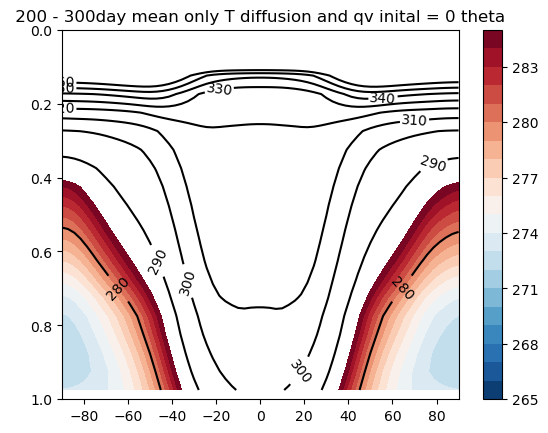

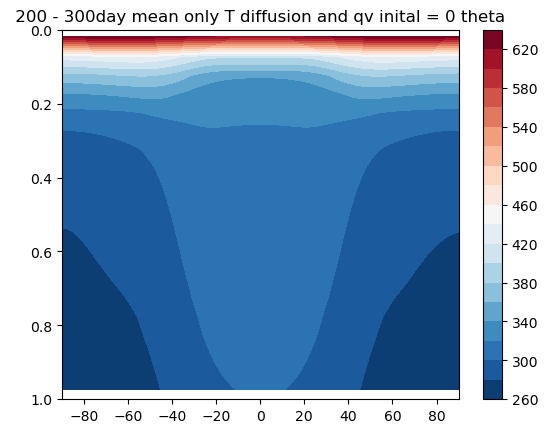

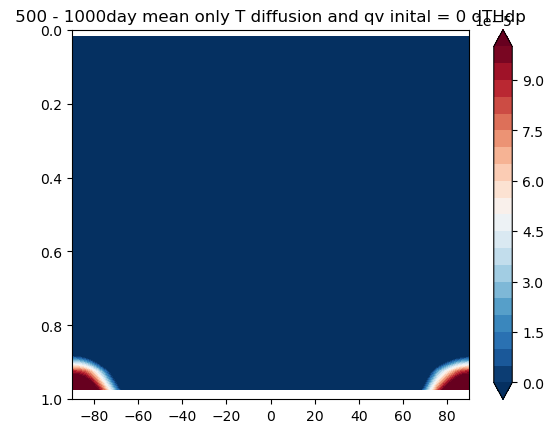

In [642]:
sigma_mean      = np.nanmean(p[0]/ps[0], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)

print(np.nanmax(1/dTHdp))
print(np.nanmin(1/dTHdp))

plt.figure()
CS = plt.contourf(yy,sigma_mean2, np.nanmean(theta[:,:,:,:], axis=(0,3)), levels=np.linspace(265,285,21), cmap="RdBu_r") #
CS2 = plt.contour(yy,sigma_mean2, np.nanmean(theta[:,:,:,:], axis=(0,3)), levels=np.arange(270,370,10), colors="k") #
plt.clabel(CS2)
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" 200 - 300day mean only T diffusion and qv inital = 0 theta ", fontsize=12)
##############################################################################################################
plt.figure()
CS = plt.contourf(yy,sigma_mean2, np.nanmean(theta[:,:,:,:], axis=(0,3)), levels=21, cmap="RdBu_r") # 
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" 200 - 300day mean only T diffusion and qv inital = 0 theta ", fontsize=12)
##############################################################################################################
plt.figure()
CS = plt.contourf(yy,sigma_mean2, dTHdp, levels=np.linspace(0,0.0001, 21), cmap="RdBu_r", extend="both") # 
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" 500 - 1000day mean only T diffusion and qv inital = 0 dTHdp ", fontsize=12)

In [633]:
print(t.shape)

(6, 1000, 20, 64, 128)


Text(0.5, 1.0, ' qv_diff ')

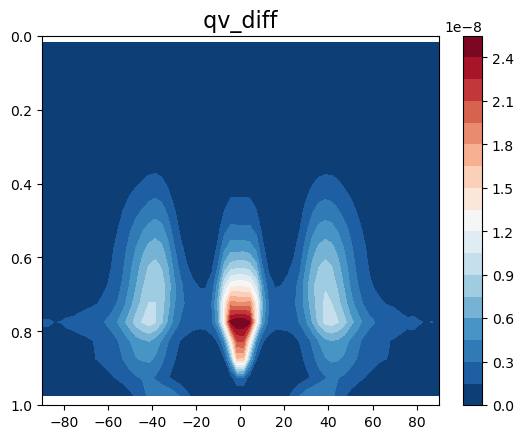

In [634]:
sigma_mean      = np.nanmean(p[0]/ps[0], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)

plt.figure()
CS = plt.contourf(yy,sigma_mean2, np.nanmean(qv_diff[0,200:], axis=(0,3)), levels=21, cmap="RdBu_r") # 
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" qv_diff ", fontsize=16)

In [635]:
xxx = np.linspace(0,360, 128)
yyy = np.linspace(-90,90, 64)

plt.figure()
CS = plt.contourf(xxx,yyy, np.nanmean(theta[:,-1,:,:]*v[:,-1,:,:], axis=(0)), levels=21, cmap="RdBu_r", extend="both") # 
plt.colorbar(CS)
# plt.ylim([1,0])
plt.title(" v * t ", fontsize=16)

ValueError: operands could not be broadcast together with shapes (1000,64,128) (6,20,64,128) 

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, ' ps ')

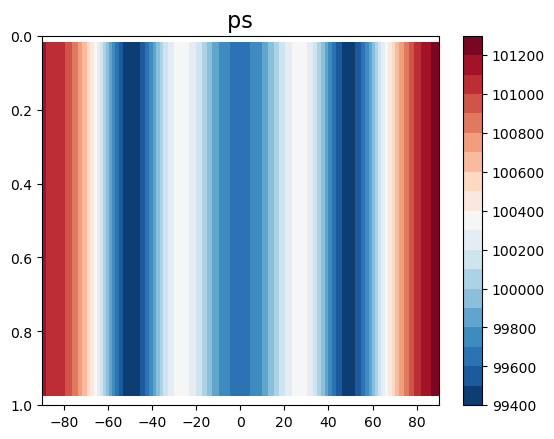

In [636]:
plt.figure()
CS = plt.contourf(yy,sigma_mean2, np.nanmean(ps[0], axis=(0,3)), levels=21, cmap="RdBu_r") # 
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" ps ", fontsize=16)

Text(0.5, 1.0, ' p ')

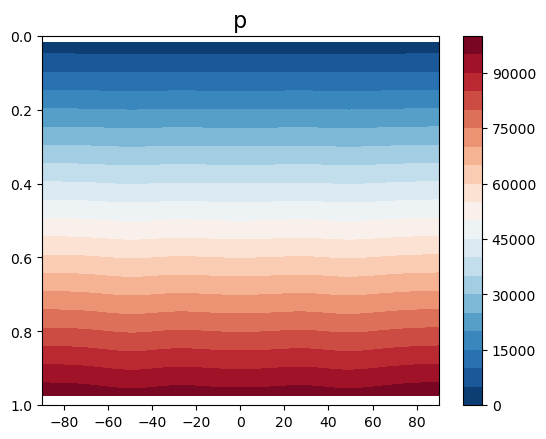

In [637]:
plt.figure()
CS = plt.contourf(yy,sigma_mean2, np.nanmean(p[0], axis=(0,3)), levels=21, cmap="RdBu_r") # 
plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" p ", fontsize=16)

Text(0.5, 1.0, 'TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)')

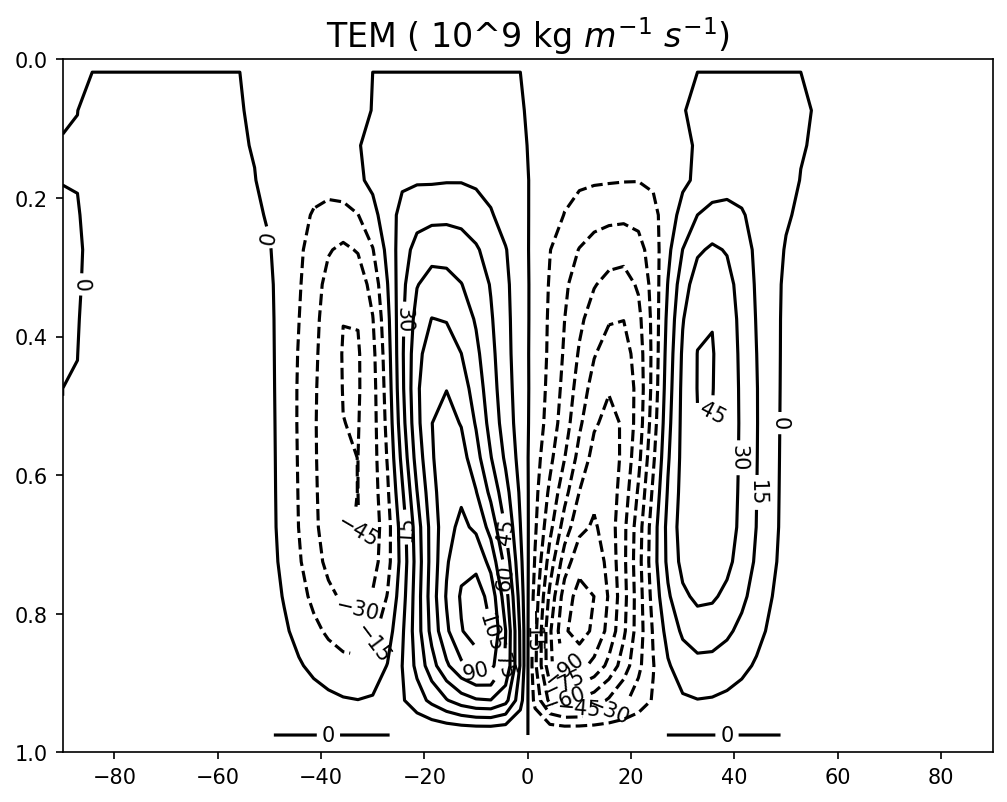

In [686]:


plt.figure(figsize=(8,6), dpi=150.)
CS = plt.contour(yy,sigma_mean2, psi_w / 10**9, levels=21, colors='k') # 
plt.clabel(CS)
plt.ylim([1,0])
plt.title("TEM ( 10^9 kg $m^{-1}$ $s^{-1}$)", fontsize=16)

Text(0.5, 1.0, 'Three cells circulation')

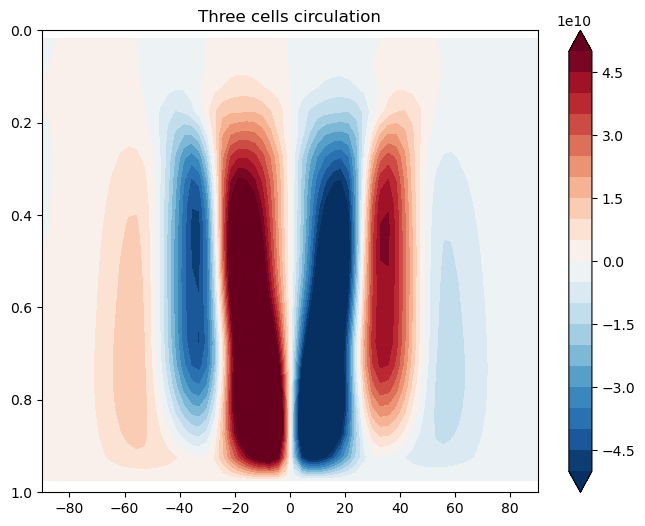

In [687]:

plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, psi_w , levels=np.linspace(-5E10,5E10,21), cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])
plt.title("Three cells circulation")

In [617]:
t.max()

304.337681016324

Text(0.5, 1.0, 't ')

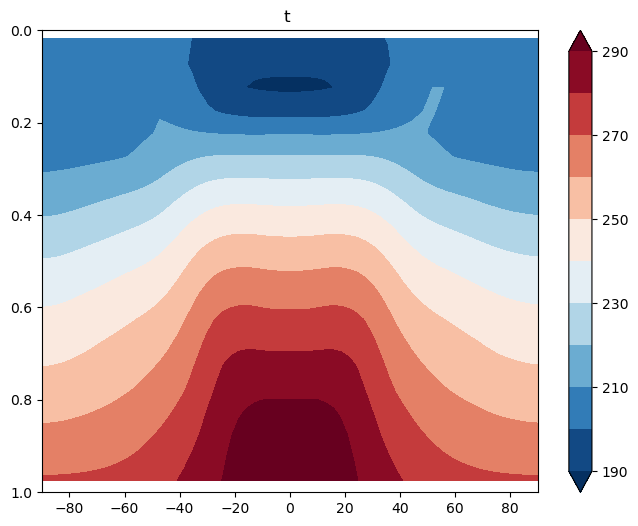

In [619]:
plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, np.nanmean(t[0,200:], axis=(0,3)) , levels=np.arange(190,300,10), cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])
plt.title("t ")

In [468]:
print(t.shape)
plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, np.nanmean(t[0], axis=(0,3)) , levels=21, cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])
plt.title(" v' theta' ")

(800, 20, 64, 128)


AxisError: axis 3 is out of bounds for array of dimension 3

<Figure size 800x600 with 0 Axes>

In [ ]:

plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, wTEM , levels=21, cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])

In [ ]:

plt.figure(figsize=(8,6), dpi=100.)
CS = plt.contourf(yy,sigma_mean2, vTEM2, levels=21, cmap="RdBu_r", extend="both") # 
# plt.clabel(CS)

plt.colorbar(CS)
plt.ylim([1,0])

In [557]:
def cal_pre(qv_diff, p_half):
    g = 9.81
    Prec = np.zeros(qv_diff.shape)
    for i in range(1,20-1):
        Prec[:,i,:,:] = 1/g * qv_diff[:,i,:,:] * (p_half[:,i+1,:,:] - p_half[:,i,:,:])
    Prec[:, 0,:,:] = 1/g * qv_diff[:, 0,:,:] * (p_half[:, 1,:,:] - p_half[:, 0,:,:])
    # self.Prec[:,-1,:,:] = 1/self.g * self.qv[:,-1,:,:] * (self.p_half[:,-1,:,:] - self.p_half[:,-2,:,:])
    
    Prec_mean = np.nansum(Prec, axis=(1))
    Prec_mean2 = np.nanmean(Prec_mean, axis=(2))
    
    return Prec_mean2, Prec

In [558]:
print(qv_diff.shape)
print(p_half.shape)


(1, 800, 20, 64, 128)
(1, 800, 21, 64, 128)


0


TypeError: Shapes of x (1000, 64) and z (800, 64) do not match

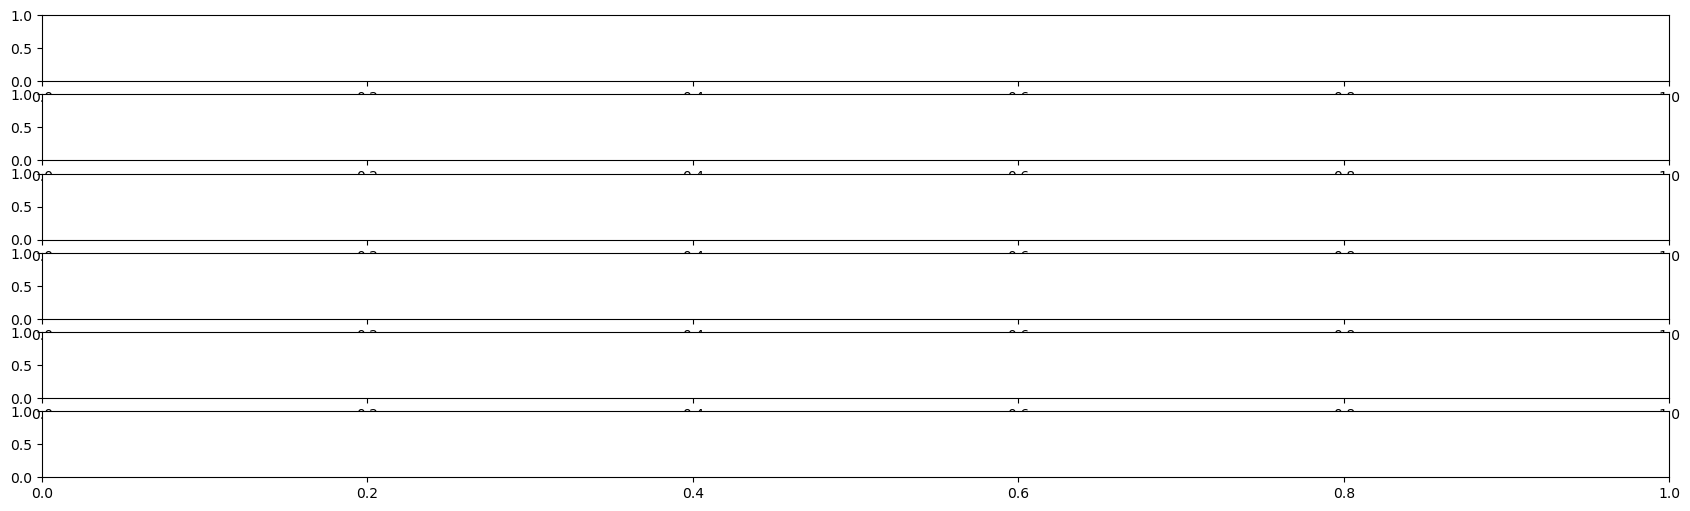

In [559]:
from Dycore import Dycore
# print(p_half.shape)

file  = "HSt42_10/RH80_PR10_20000day_startfrom_0day_final.dat"

dycore = Dycore(file)
### fig
y = np.linspace(-90,90,64)
total_day = int(total_file*internal_day)
time = np.linspace(start, end, total_day)


yy, tt = np.meshgrid(y,time)
fig,ax   = plt.subplots(int((pr_to - pr_start)/pr_leap),figsize=(21,6))

do_check_qv = True
do_check_KE = False
do_check_t  = False

test = np.zeros(((int((pr_to - pr_start)/pr_leap), tt.shape[0], tt.shape[1])))
a = 0           
for pr in range(pr_start, pr_to, pr_leap):
    if do_check_qv:
        print(a)
        Prec_new, Prec_all   = cal_pre(qv_diff[0], p_half[0])
        # print(np.shape(np.array(Prec_new)))
        CS = plt.contourf(tt, yy, Prec_new[:,:] * 86400,levels=np.linspace(0,8,21), extend="max")    
        fig.colorbar(CS, orientation='vertical',fraction=0.046, pad=0.04)
        plt.title(f"PR={pr},Precipitation [mm/day], RH=80%")    
        plt.xlabel("time")
        plt.ylabel("latutide")
        test[a] = Prec_new
        a += 1
    if do_check_KE:
        get_KE = dycore.cal_KE(u[a], v[a])   
        CS = plt.contourf(tt, yy, get_KE,levels=np.linspace(60,1200,21), extend="both")
        fig.colorbar(CS, orientation='vertical',fraction=0.046, pad=0.04)
        # ax[a].set_title(f"Kinetic Energy [kJ/kg], PR={pr}")
        # ax[-1].set_xlabel("time")
        # ax[a].set_ylabel("latutide")
        a += 1
    if do_check_t:
        t_mean = np.nanmean(t[:,:,:,:], axis=(1,3))
        CS = plt.contourf(tt, yy, t_mean,levels=21, extend="both")
        fig.colorbar(CS, orientation='vertical',fraction=0.046, pad=0.04)
        # ax[a].set_title(f"Temperature [K], PR={pr}")
        # ax[-1].set_xlabel("time")
        # ax[a].set_ylabel("latutide")
        a += 1
        
if do_check_qv:
    fig.tight_layout()
    # plt.savefig("check_qv_equilibrium.png", dpi=300., bbox_inches='tight')
    plt.show()
if do_check_KE:
    fig.tight_layout()
    # plt.savefig("check_KE_equilibrium.png", dpi=300., bbox_inches='tight')
    plt.show()
if do_check_t:
    fig.tight_layout()
    # plt.savefig("check_T_equilibrium.png", dpi=300., bbox_inches='tight')
    plt.show()

print("done")

In [447]:
Prec_all.shape

(800, 20, 64, 128)

(1.0, 0.0)

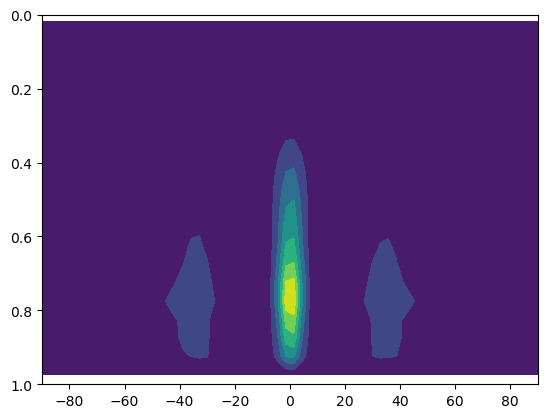

In [561]:
sigma_mean      = np.nanmean(p[0]/ps[0], axis=(0,3))
sigma_onlyz     = np.nanmean(sigma_mean, axis=1)
y               = np.linspace(-90,90,64)
yy, sigma_mean2 = np.meshgrid(y,sigma_onlyz)

plt.figure()
plt.contourf(yy, sigma_mean2, np.nanmean(Prec_all[-200:,:,:,:], axis=(0,3)))
plt.ylim([1,0])